#Multiple Restarts Hill-climbing

The idea is to have an outer loop that will iterate num_iter
times. Each time a new randomly generated solution will be produced and a hill-climbing
method will be run from it. You need to keep record of the best solution found. This will be
the output of the algorithm.

In [14]:
import urllib2  # the lib that handles the url stuff
import numpy as np
import pandas as pd
#from random import randint
import random

input_data = []
url = "http://www.cs.stir.ac.uk/~goc/source/hard200.txt"
data = urllib2.urlopen(url) # it's a file like object and works just like a file
for line in data: # files are iterable
    input_data.append(map(int,line.split()))

instance_number = input_data.pop(0)[0]
max_capacity = input_data.pop()[0]
df = pd.DataFrame(input_data, columns=['no.', 'value', 'weight'])
df.head()

,no.,value,weight
0,1,835,735
1,2,1670,1470
2,3,3340,2940
3,4,1087,987
4,5,1087,987


In [15]:
#function to generate a binary representation of the items selected. 
def binrep(n,r):
    return "{0:0{1}b}".format(n, r)
#random.randint(1, 2**instance_number)
weights = np.array(df["weight"])   
values = np.array(df["value"])

In [28]:
best_value = 0
num_inter = 1000 #how many random points we use to initially use for search
lst_best_value = []

while num_inter >0:
    max_eval = 1000
    items_selected = np.array(map(int,binrep(random.randint(1, 2**instance_number), instance_number)))
    while max_eval >0:
        total_value = np.dot(values,items_selected)
        total_weight = np.dot(weights,items_selected)
        if total_weight <= max_capacity:
            if total_value > best_value:
                best_value = total_value
                lst_best_value.append(best_value)
        idx = random.randint(0,instance_number-1)
        items_selected[idx] = int(not items_selected[idx]) 
        max_eval -=1
    num_inter -= 1
print lst_best_value
print "best value = ",max(lst_best_value)

[116664, 116784, 117658, 117797, 119904, 121179, 121789, 122773, 126058, 126267, 129497, 130194, 130380, 131171, 131508, 131995, 132732, 132923, 132935, 132982, 132989, 132999, 133297, 133570, 133727]
best value =  133727


<function matplotlib.pyplot.show>

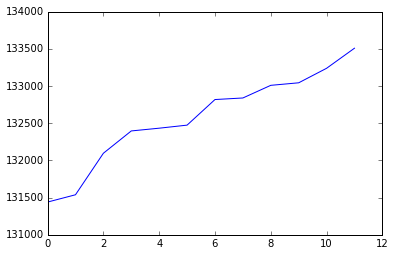

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(xrange(0,len(lst_best_value))), lst_best_value)
plt.show

5